# 1. 导入包

In [1]:
# -*- coding: utf-8 -*-
"""
Python 3.7.7
sklearn 0.23.1
使用简单线性回归根据年龄预测医疗费用
"""

# 导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 2. 导入数据集

In [2]:
# 导入数据集
data = pd.read_csv('insurance.csv')

# 3. 数据预处理

## 3.1 检测缺失值

In [3]:
# 检测缺失值
null_df = data.isnull().sum()

## 3.2 筛选数据

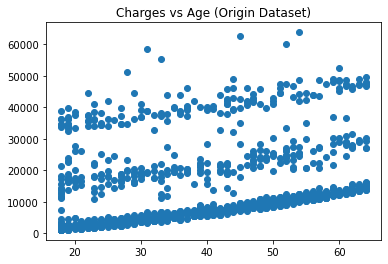

In [4]:
# 画出age和charges的散点图
plt.figure()
plt.scatter(data['age'], data['charges'])
plt.title('Charges vs Age (Origin Dataset)')
plt.show()

In [5]:
# 筛选数据
new_data_1 = data.query('age<=40 & charges<=10000') # 40岁以下 且 10000元以下
new_data_2 = data.query('age>40 & age<=50 & charges<=12500') # 40岁至50岁之间 且 12500元以下
new_data_3 = data.query('age>50 & charges<=17000') # 50岁以上 且 17000元以下
new_data = pd.concat([new_data_1, new_data_2, new_data_3], axis=0)

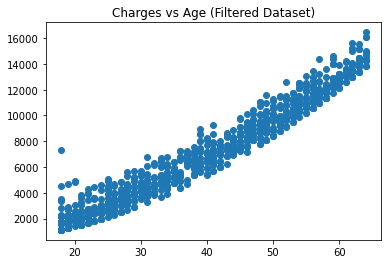

In [6]:
# 画出age和charges的散点图
plt.figure()
plt.scatter(new_data['age'], new_data['charges'])
plt.title('Charges vs Age (Filtered Dataset)')
plt.show()

In [7]:
# 检查age和charges的相关性
print('age和charges的相关性是：\n', np.corrcoef(new_data['age'], new_data['charges']))

age和charges的相关性是：
 [[1.         0.97552029]
 [0.97552029 1.        ]]


## 3.3 得到自变量和因变量

In [8]:
# 得到自变量和因变量
x = new_data.iloc[:, 0:1].values
y = new_data['charges'].values

## 3.4 拆分训练集和测试集

In [9]:
# 拆分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# 4. 构建不同参数的简单线性回归模型

## 4.1 模型1：构建简单线性回归模型

### 4.1.1 构建简单线性回归模型

In [10]:
# 构建不同参数的简单线性回归模型
# 模型1：构建线性回归模型（normalize = True, fit_intercept = True）
regressor = LinearRegression(normalize = True, fit_intercept = True)
regressor.fit(x_train, y_train)

LinearRegression(normalize=True)

### 4.1.2 得到模型线性表达式

In [11]:
# 得到线性表达式： Charges = a * Age + b
print('Charges = %.2f * Age + (%.2f)' %(regressor.coef_, regressor.intercept_)) # Charges = 266.97 * Age + -3461.37

Charges = 266.97 * Age + (-3461.37)


### 4.1.3 预测测试集

In [12]:
# 预测测试集
y_pred = regressor.predict(x_test)

### 4.1.4 得到模型MSE

In [13]:
# 得到模型的MSE
mse_score = mean_squared_error(y_test, y_pred)
print('简单线性回归模型的MSE是：%.2f' %(mse_score)) # 738,002.02

简单线性回归模型的MSE是：738002.02


### 4.1.5 可视化测试集

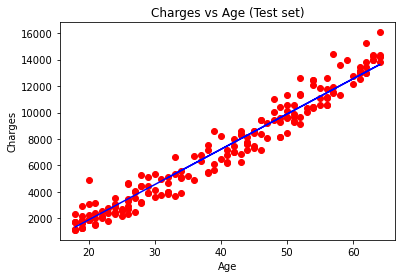

In [14]:
# 可视化测试集
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, y_pred, color = 'blue')
plt.title('Charges vs Age (Test set)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

## 4.2 模型2：构建简单线性回归模型

In [15]:
# 模型2：构建线性回归模型（normalize = False, fit_intercept = True）
regressor = LinearRegression(normalize = False, fit_intercept = True)
regressor.fit(x_train, y_train)

LinearRegression()

In [16]:
# 得到线性表达式： Charges = a * Age + b
print('Charges = %.2f * Age + (%.2f)' %(regressor.coef_, regressor.intercept_)) # Charges = 266.97 * Age + -3461.37

Charges = 266.97 * Age + (-3461.37)


In [17]:
# 预测测试集
y_pred = regressor.predict(x_test)

In [18]:
# 得到模型的MSE
mse_score = mean_squared_error(y_test, y_pred)
print('简单线性回归模型的MSE是：%.2f' %(mse_score)) # 738,002.02

简单线性回归模型的MSE是：738002.02


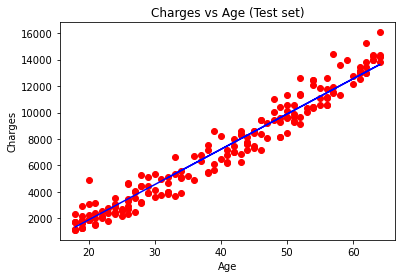

In [19]:
# 可视化测试集
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, y_pred, color = 'blue')
plt.title('Charges vs Age (Test set)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

## 4.3 模型3：构建简单线性回归模型

In [20]:
# 模型3：构建线性回归模型（normalize = False, fit_intercept = False）
regressor = LinearRegression(normalize = False, fit_intercept = False)
regressor.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [21]:
# 得到线性表达式： Charges = a * Age + b
print('Charges = %.2f * Age' %(regressor.coef_)) # Charges = 188.91 * Age

Charges = 188.91 * Age


In [22]:
# 预测测试集
y_pred = regressor.predict(x_test)

In [23]:
# 得到模型的MSE
mse_score = mean_squared_error(y_test, y_pred)
print('简单线性回归模型的MSE是：%.2f' %(mse_score)) # 2,404,889.50

简单线性回归模型的MSE是：2404889.50


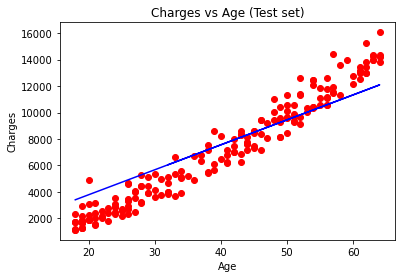

In [24]:
# 可视化测试集预测结果
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, y_pred, color = 'blue')
plt.title('Charges vs Age (Test set)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

#### 结论：
由上图可见，为样本点拟合了一条直线